   author_popularity  book_length  num_keywords    genre
0          41.052297          776             5  mystery
1          48.950098          674             5  mystery
2           2.323401          633            19  fantasy
3          41.564184          169            12  mystery
4          65.129649          992            18  fantasy
Encoded genres: ['fantasy' 'fiction' 'mystery' 'non-fiction']


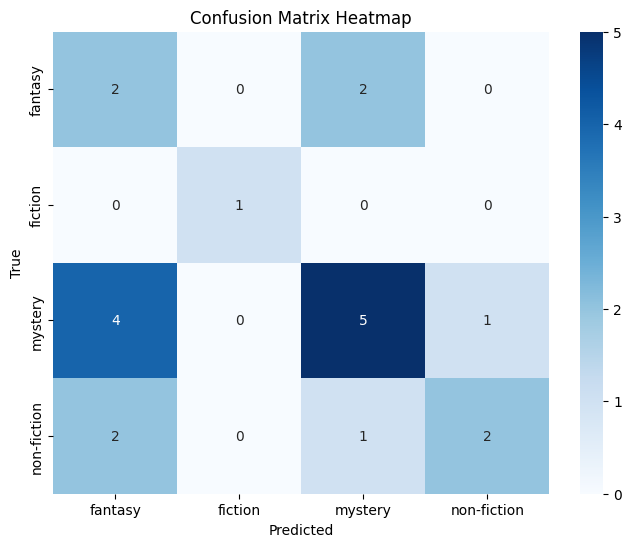

Accuracy: 0.50
Precision: 0.58
Recall: 0.50
F1 Score: 0.52


In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (Assuming the data is in a CSV file called 'book_data.csv')
data = pd.read_csv('/content/book_genres.csv')

# Show the first few rows of the dataset
print(data.head())

# Extract features and target variable
X = data[['author_popularity', 'book_length', 'num_keywords']]  # Features
y = data['genre']  # Target label (genre)

# Encode the categorical target variable (genre) using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Show the encoded labels for genres
print("Encoded genres:", label_encoder.classes_)

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate Precision (weighted average for multi-class)
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

# Calculate Recall (weighted average for multi-class)
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.2f}')

# Calculate F1-Score (weighted average for multi-class)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')
